# Real City Road Network Simplification
This notebook gives a brief overview on how to simplify real road network.

In [1]:
import warnings
warnings.filterwarnings('ignore')
%load_ext autoreload
%autoreload 2
import sys 
sys.path.append("../")
import osmnx as ox
import torch as th
import networkx as nx
import dgl

Using backend: pytorch


In [2]:
DATA_FOLDER = "../data_example/"

First generate original road network graph and visualize it.

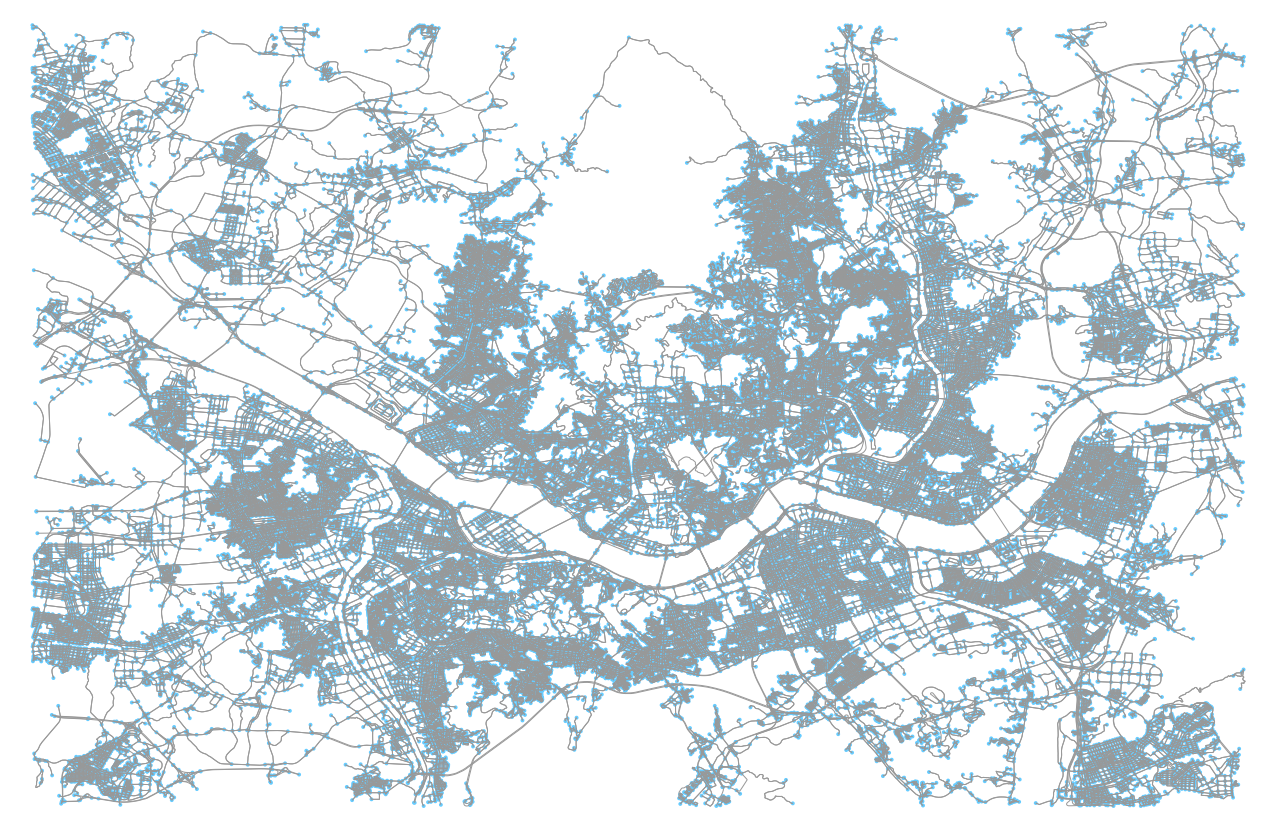

(<Figure size 1628.49x1080 with 1 Axes>, <AxesSubplot:>)

In [3]:
# You can get road network from bbox.
# But it seems osmnx dataset is constantly updated and there may be some differences.
# Therefore, we upload the raw file.

# (1) load from bounding box coordinate
# G_original = ox.graph_from_bbox(37.704811, 37.427103, 127.183239, 126.763642, network_type='drive')

# (2) load from saved file
G_original = ox.load_graphml(filepath=DATA_FOLDER+'seoul_rectangular_drive_network_original.graphml')

ox.plot_graph(G_original, fig_height=15)

Then simplify the graph as described in the supplemantary material and save it.

In [4]:
from graph_utils import *
import osmnx.utils_graph

G_simplified = simplify_graph_remove_unimportant_roads(G_original)
G_simplified = simplify_graph_remove_boundary_nodes(G_simplified)
G_simplified = simplify_graph_remove22(G_simplified)
G_simplified = simplify_graph_remove11(G_simplified)
G_simplified = simplify_graph_merge_short(G_simplified, threshold=100)
G_simplified = linefy_all_geom(G_simplified)
G_simplified = osmnx.utils_graph.get_largest_component(G_simplified, strongly=True)
for edge in G_simplified.edges(data=True):
    u, v, data = edge
    data['u'] = u
    data['v'] = v

Number of nodes: 85345, Number of edges: 243621
Number of nodes: 26455, Number of edges: 52933
Number of nodes: 25765, Number of edges: 51954
Boundary Removed
Number of nodes: 24595, Number of edges: 49614
== Removed
Number of nodes: 11801, Number of edges: 24026
-- Removed
Number of nodes: 8664, Number of edges: 20889
Short removed
Number of nodes: 4553, Number of edges: 13334


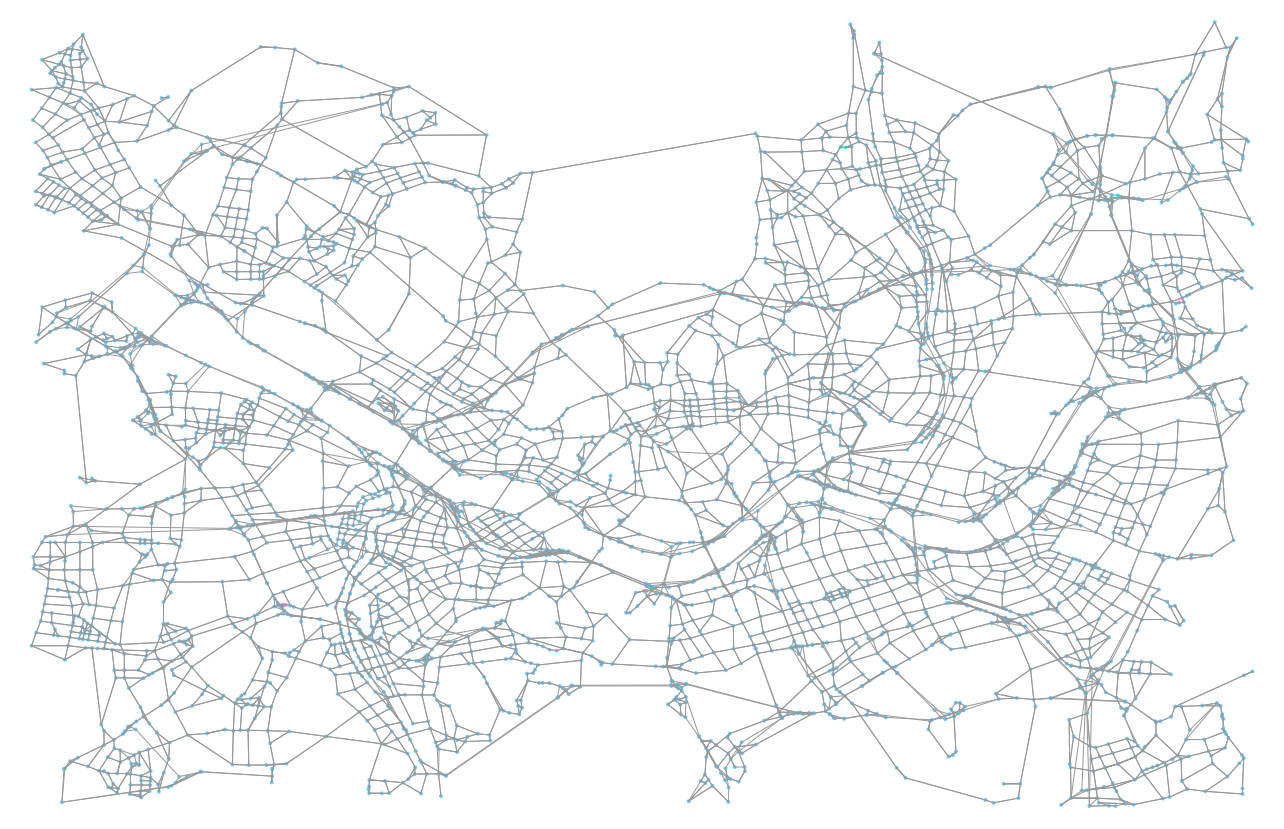

(<Figure size 1638.61x1080 with 1 Axes>, <AxesSubplot:>)

In [5]:
ox.plot_graph(G_simplified, fig_height=15)

Also check node numbers after line graph conversion.

In [6]:
g = dgl.DGLGraph()
g.from_networkx(G_simplified, edge_attrs=['length', 'u', 'v'])
g_line = g.line_graph(shared=True)
print("After line graph conversion, Node #: %d, Edge #: %d" % (g_line.number_of_nodes(), g_line.number_of_edges()))

After line graph conversion, Node #: 13334, Edge #: 45114


In [7]:
ox.save_graphml(G_simplified, filepath=DATA_FOLDER+'seoul_rectangular_drive_network_simplified.graphml')